In [2]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

data = pd.read_csv('DataScience_salaries_2024.csv')

In [3]:
data.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
1,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L
2,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
3,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
4,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L


In [4]:
data.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14838 entries, 0 to 14837
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           14838 non-null  int64 
 1   experience_level    14838 non-null  object
 2   employment_type     14838 non-null  object
 3   job_title           14838 non-null  object
 4   salary              14838 non-null  int64 
 5   salary_currency     14838 non-null  object
 6   salary_in_usd       14838 non-null  int64 
 7   employee_residence  14838 non-null  object
 8   remote_ratio        14838 non-null  int64 
 9   company_location    14838 non-null  object
 10  company_size        14838 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.2+ MB


In [6]:
data.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,14838.000000,1.483800e+04,14838.000000,14838.000000
mean,2023.138900,1.650227e+05,149874.718763,32.760480
std,0.700799,3.562354e+05,69009.181349,46.488278
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.021000e+05,102000.000000,0.000000
50%,2023.000000,1.422000e+05,141300.000000,0.000000
75%,2024.000000,1.875000e+05,185900.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


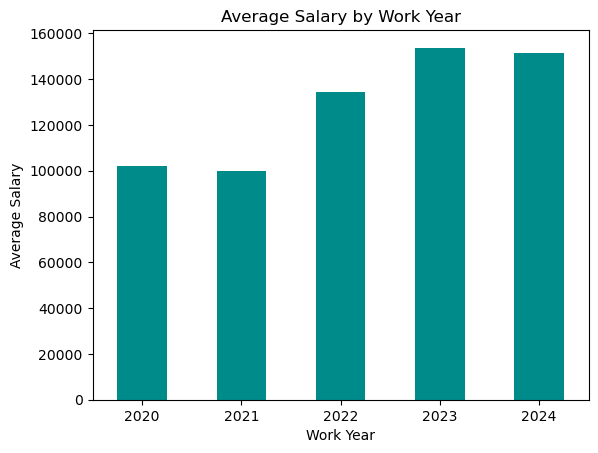

In [22]:
#group by work year and plot the average salary
data.groupby('work_year')['salary_in_usd'].mean().plot(kind='bar', color='darkcyan')
plt.title('Average Salary by Work Year')
plt.xlabel('Work Year')
plt.ylabel('Average Salary')
plt.xticks(rotation=0)
plt.show()

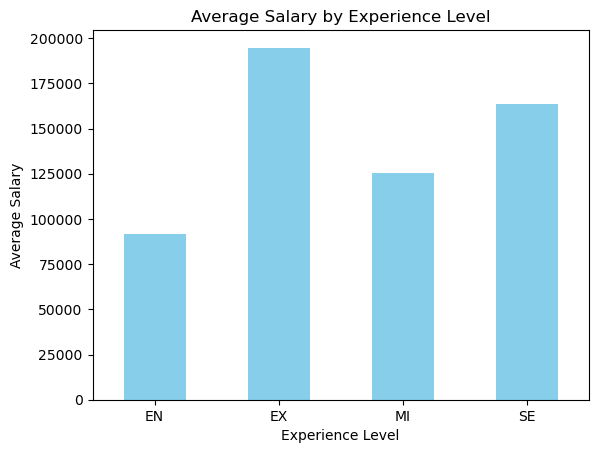

In [25]:
#average salary by experience level
data.groupby('experience_level')['salary_in_usd'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary')
plt.xticks(rotation=0)
plt.show()

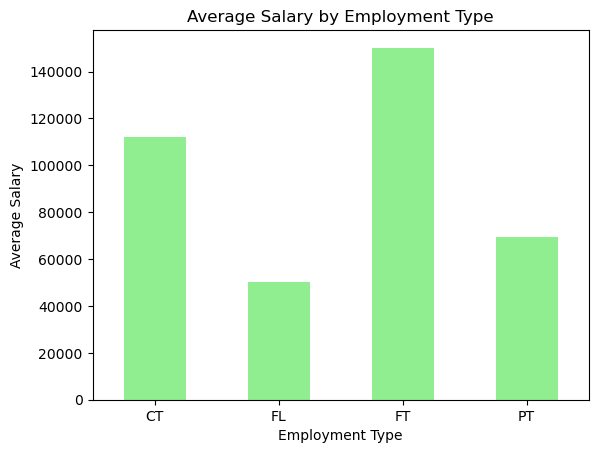

In [26]:
#average salary by employment type 
data.groupby('employment_type')['salary_in_usd'].mean().plot(kind='bar', color='lightgreen')
plt.title('Average Salary by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Average Salary')
plt.xticks(rotation=0)
plt.show()

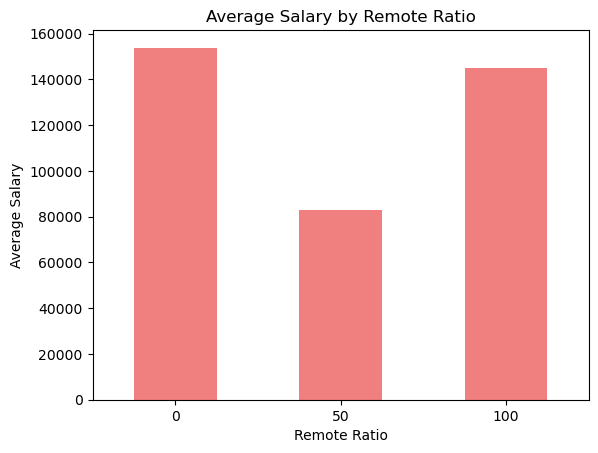

In [36]:
#average salary by remote ratio
data.groupby('remote_ratio')['salary_in_usd'].mean().plot(kind='bar', color='lightcoral')
plt.title('Average Salary by Remote Ratio')
plt.xlabel('Remote Ratio')
plt.ylabel('Average Salary')
plt.xticks(rotation=0)
plt.show()

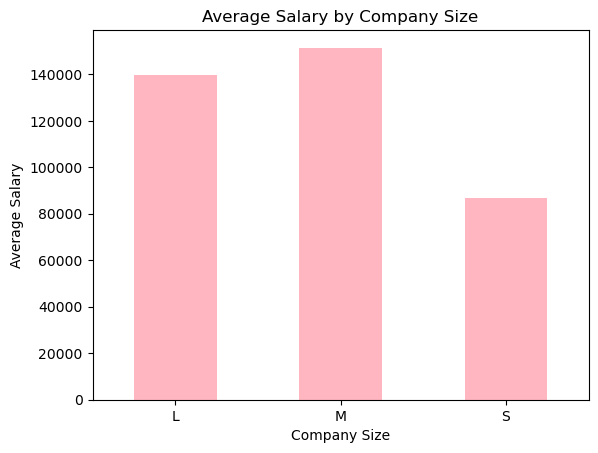

In [38]:
#average salary by company size
data.groupby('company_size')['salary_in_usd'].mean().plot(kind='bar', color='lightpink')
plt.title('Average Salary by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Average Salary')
plt.xticks(rotation=0)
plt.show()

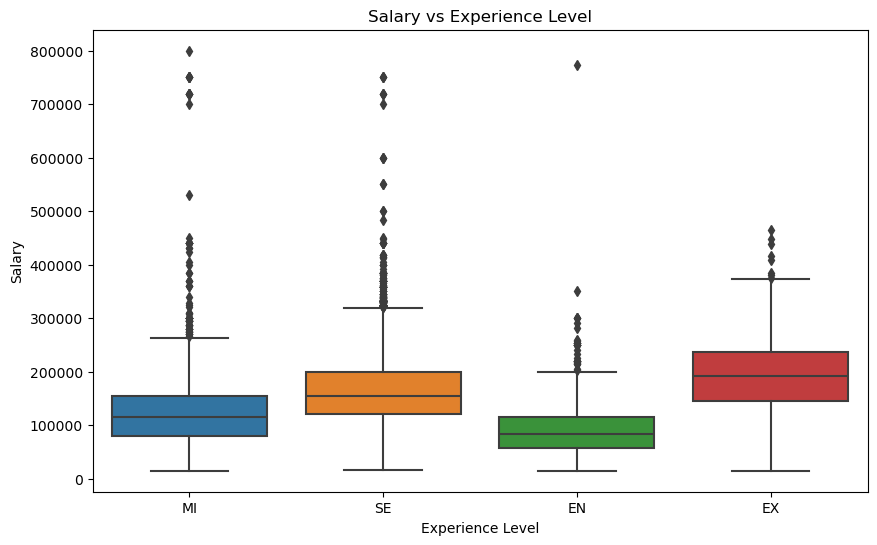

In [43]:
#relation between experience level and salary
plt.figure(figsize=(10, 6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=data)
plt.title('Salary vs Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary')
plt.show()